## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

## Reading and Understanding the Data

In [2]:
df = pd.read_csv('creditcard.csv')


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# create data backup
original = df.copy()

## Exploratory data analysis

Here we will observe the distribution of our classes

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print("Normal Share :", normal_share)
print("Fraud Share :", fraud_share)

Normal Share : 99.82725143693798
Fraud Share : 0.1727485630620034


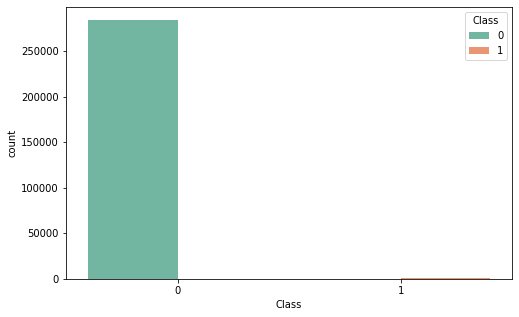

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(8, 5))
sns.countplot(x="Class", data=df, hue=df.Class, palette="Set2")
plt.show()



This dataset is highly imbalanced with only 0.172 % of fraudulent transactions

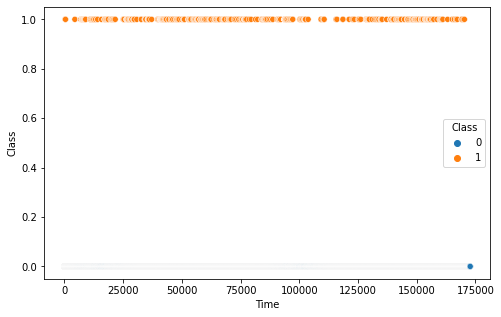

In [11]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(8, 5))
sns.scatterplot(y="Class", x="Time", data=df, hue="Class")
plt.show()

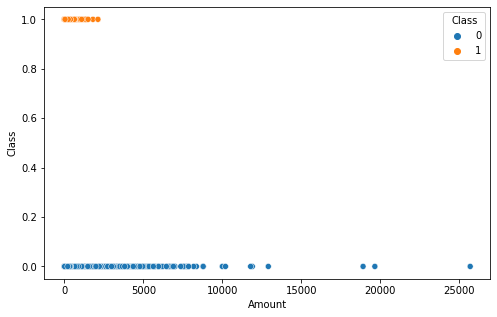

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount

plt.figure(figsize=(8, 5))
sns.scatterplot(y="Class", x="Amount", data=df, hue="Class")
plt.show()

 * Time column is evenly distributed for all fraudulent transactions
 * We can see Fraudulent transactions are less than 5000
 
Hence we can drop Time column

<Figure size 5760x1440 with 0 Axes>

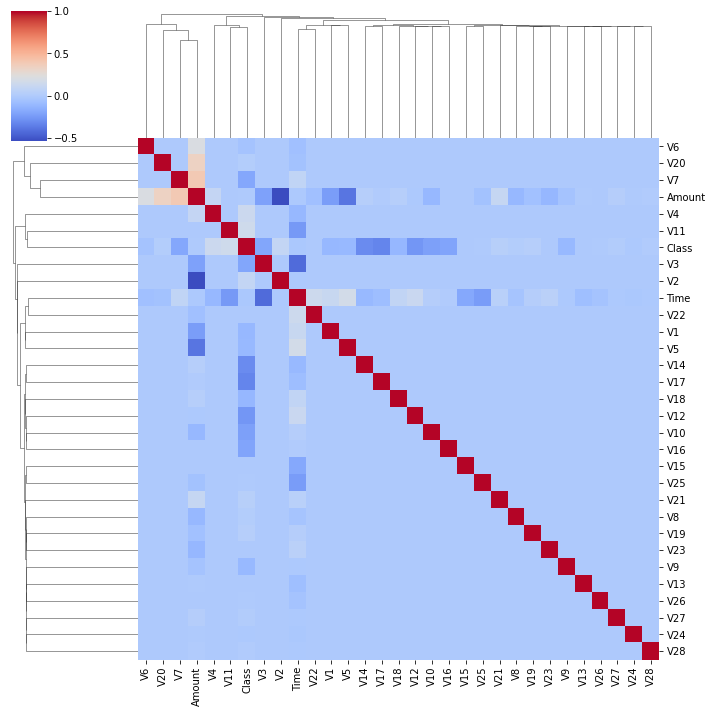

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(80, 20))
sns.clustermap(corr_matrix, cmap="coolwarm")
plt.show()

In [14]:
# Drop unnecessary columns

df = df.drop("Time", axis = 1)


### Splitting the data into train & test data

In [15]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [16]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y
)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [17]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Feature Scaling

Lets scale Amount Column as other columns are standardized


In [18]:
# scaling numerical columns
scaler = MinMaxScaler()

X_train[['Amount']] = scaler.fit_transform(X_train[['Amount']])
X_test[['Amount']] = scaler.transform(X_test[['Amount']])

### Plotting the distribution of a variable

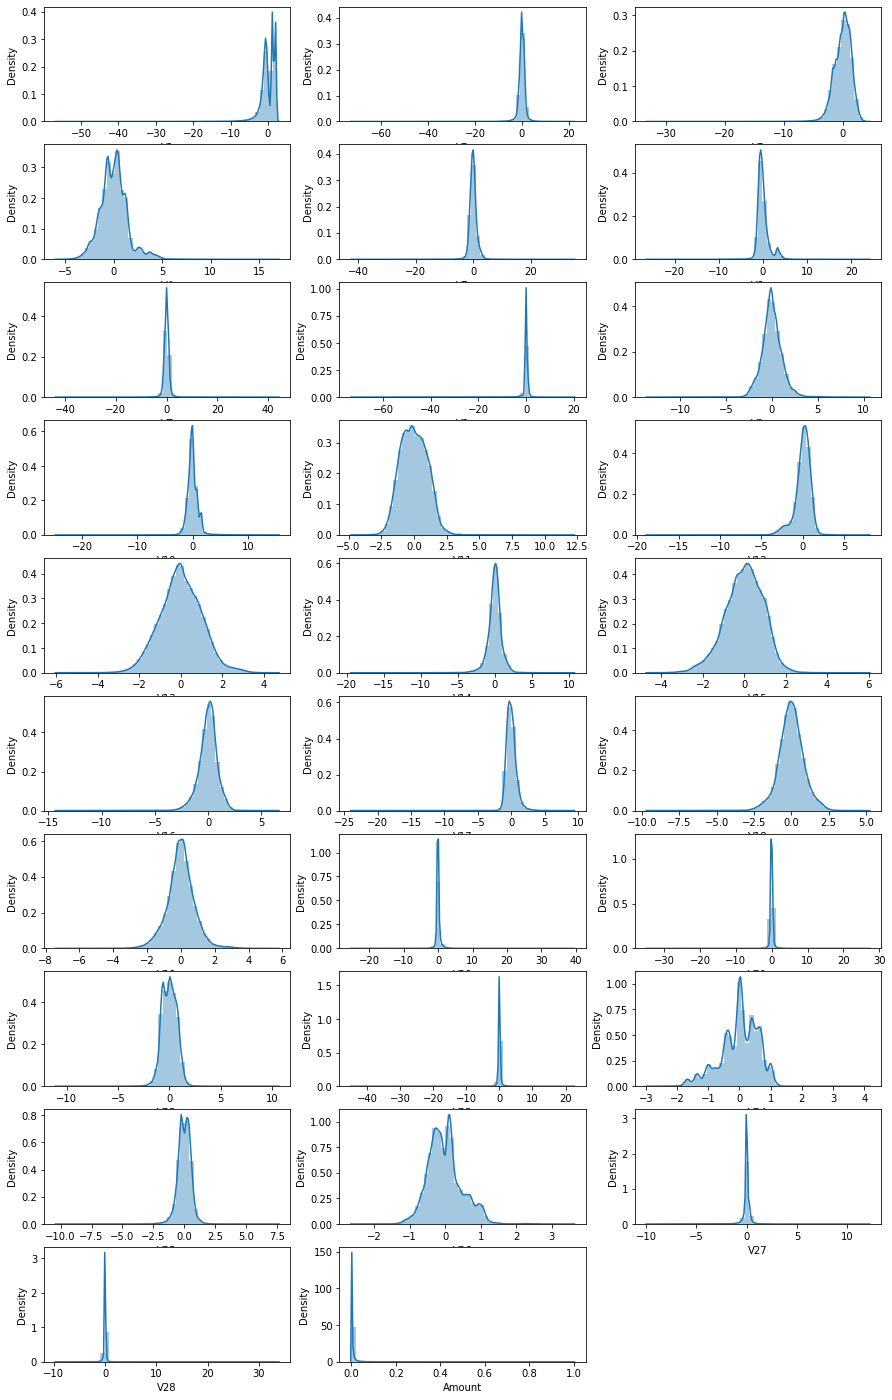

In [19]:
# plot the histogram of a variable from the dataset to see the skewness
cols = X_train.columns

plt.figure(figsize=(15,30))

row = 0
for column_name in cols:
    row += 1
    plt.subplot(12, 3, row)
    sns.distplot(X_train[column_name])

plt.show()

We can see lots of features are skewed. Lets apply Power Transformer

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [20]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer()

cols = X_train.columns
#Fit transform on train set
X_train[cols] = power.fit_transform(X_train[cols])

#Transform on test set
X_test[cols] = power.transform(X_test[cols])



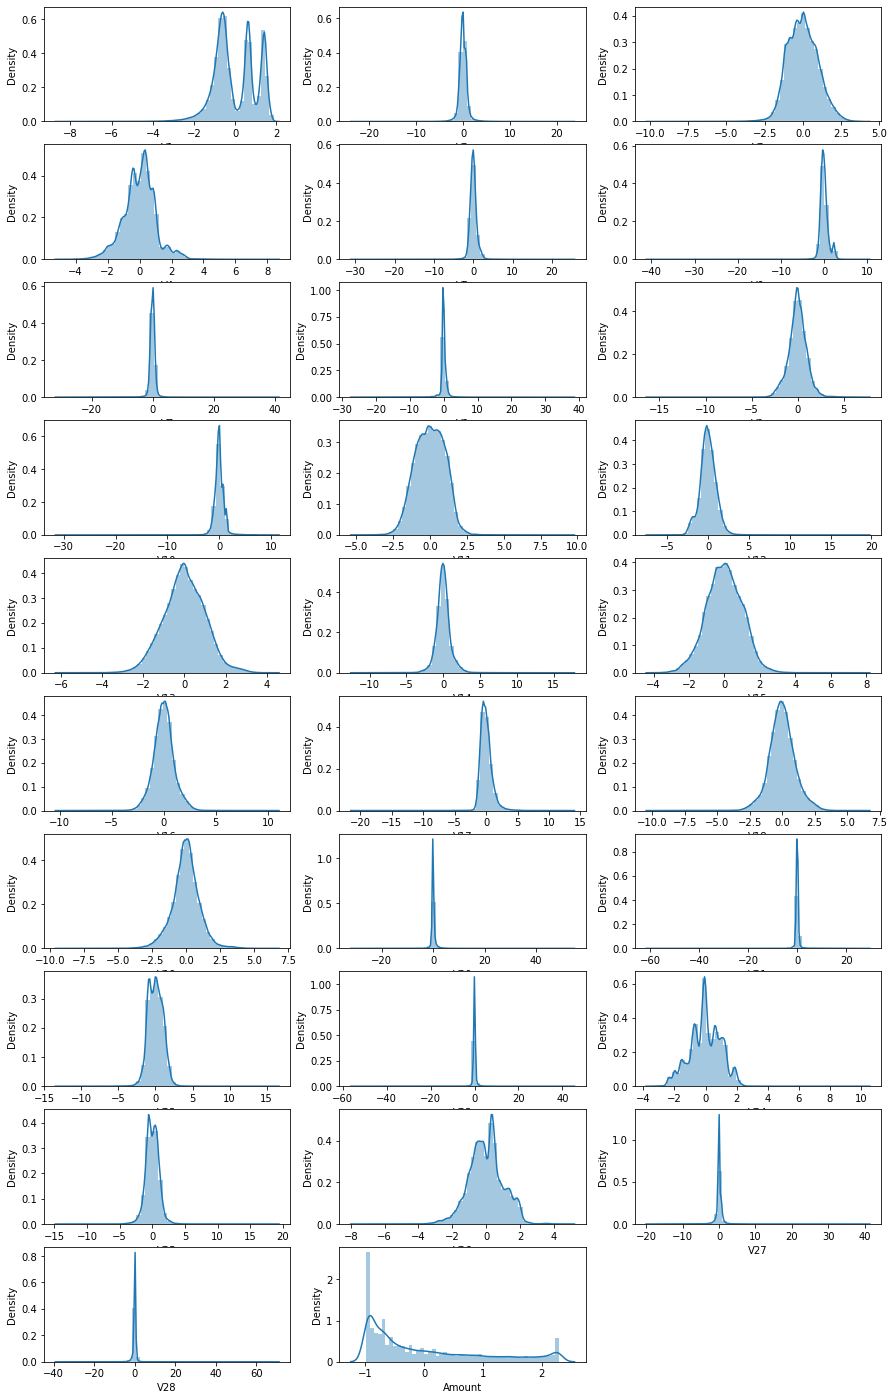

In [21]:
# plot the histogram of a variable from the dataset again to see the result 

cols = X_train.columns

plt.figure(figsize=(15,30))

row = 0
for column_name in cols:
    row += 1
    plt.subplot(12, 3, row)
    sns.distplot(X_train[column_name])

plt.show()

### Model Building with imbalanced data
We are going to build models on below mentioned algorithms and we will compare for the best model. We are not building models on SVM, RandomForest and KNN as these algorithms are computationaly expensive and need more computational resources specially for the SVM and KNN. KNN algorithms calculate distance between each data points and then this calculation iterates for all the data points to calcualte the nearest neighbour. This process is computationally very expensive when we have very large data set. We do not have these resource available so we are skipping these models.

- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

Metric selection on imbalance data
We are going to use ROC-AUC score as the evaluation metric for the model evaluation purpose. As the data is highly imbalanced and we have only 0.17% fraud cases in the whole data, accuracy will not be the right metric to evaluate the model.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
#from sklearn.metrics import confusion_matrix

from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    classification_report,
    precision_recall_curve,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score)

In [23]:
# Plotting ROC
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % auc_score)
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

    return None



model = list()
resample = list()
accu = list()
precision = list()
recall = list()
F1score = list()
roc_auc = list()

# Extracted method to calucualte all the metrics for model
def evaluate_model(y_df, y_pred, y_train_pred_proba, mod=None, sampling=None, is_test=False):

    print("Confusion Matrix ", "\n")
    confusion = confusion_matrix(y_df, y_pred)
    print(confusion, "\n")

    acc = accuracy_score(y_df, y_pred)
    print("Accuracy :", acc)

    prec = precision_score(y_df, y_pred)
    print("Precision :", prec)

    rec = recall_score(y_df, y_pred)
    print("Recall :", rec)

    auc = roc_auc_score(y_df, y_train_pred_proba)
    print("AUC-ROC :", auc, "\n")

    print("Classification Report ", "\n")
    print(classification_report(y_df, y_pred))

    if is_test == True:
        model.append(mod)
        resample.append(sampling)
        accu.append(acc)
        precision.append(prec)
        recall.append(rec)
        roc_auc.append(auc)
        F1score.append(f1_score(y_df, y_pred))

### Logistic Regression


In [24]:


num_C = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
cv_num = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)

# perform cross validation using Gridsearch CV
model_cv = GridSearchCV(estimator = LogisticRegression(), 
                        param_grid = num_C, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1)

# fitting the model
model_cv.fit(X_train, y_train) 

# print roc score
print("Logistic Regression ROC score : ", model_cv.best_score_)

# print best hyperparameters
print("Logistic Regression best hyperparameters : ", model_cv.best_params_)



Fitting 5 folds for each of 7 candidates, totalling 35 fits
Logistic Regression ROC score :  0.9789729414112098
Logistic Regression best hyperparameters :  {'C': 0.01}


In [25]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.222900,0.015447,0.015758,0.001050,0.001,{'C': 0.001},0.995308,0.967897,0.973419,0.977234,0.968120,0.976395,0.010079,3,0.977391,0.983636,0.979792,0.981087,0.984192,0.981220,0.002505
1,0.300187,0.021451,0.015558,0.001114,0.01,{'C': 0.01},0.994257,0.969783,0.974420,0.982722,0.973682,0.978973,0.008727,1,0.981965,0.986867,0.984413,0.984035,0.987327,0.984921,0.001967
2,0.415679,0.042614,0.017231,0.002769,0.1,{'C': 0.1},0.991551,0.966550,0.973039,0.985071,0.969969,0.977236,0.009497,2,0.981534,0.986120,0.983675,0.982689,0.987040,0.984212,0.002070
3,0.428882,0.044469,0.014694,0.000674,1,{'C': 1},0.990638,0.965171,0.972434,0.985434,0.968176,0.976371,0.009938,4,0.981043,0.985604,0.983167,0.982027,0.986688,0.983706,0.002130
4,0.469286,0.035748,0.017741,0.005008,10,{'C': 10},0.990526,0.965020,0.972347,0.985473,0.967966,0.976267,0.009988,5,0.980978,0.985531,0.983101,0.981945,0.986641,0.983639,0.002137
5,0.422521,0.033979,0.014278,0.000311,100,{'C': 100},0.990520,0.965002,0.972339,0.985476,0.967944,0.976256,0.009996,6,0.980971,0.985524,0.983094,0.981935,0.986636,0.983632,0.002138
6,0.408857,0.031414,0.014635,0.000414,1000,{'C': 1000},0.990519,0.964999,0.972336,0.985474,0.967940,0.976254,0.009997,7,0.980970,0.985523,0.983093,0.981935,0.986636,0.983632,0.002138


In [26]:
# Fit on the best model
best_lr_model = model_cv.best_estimator_
best_lr_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [27]:

# Predictions on the train set
y_train_pred = best_lr_model.predict(X_train)

# Predicted probability on train set
y_train_pred_proba = best_lr_model.predict_proba(X_train)[:,1]

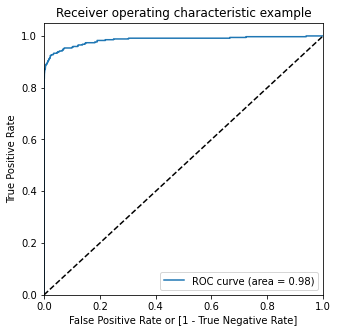

In [28]:
draw_roc(y_train, y_train_pred_proba)

In [29]:
evaluate_model(y_train, y_train_pred, y_train_pred_proba, mod="Logistic Regression", sampling=None, is_test=False)

Confusion Matrix  

[[198997     23]
 [   121    223]] 

Accuracy : 0.9992777030958447
Precision : 0.9065040650406504
Recall : 0.6482558139534884
AUC-ROC : 0.984499907102944 

Classification Report  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.91      0.65      0.76       344

    accuracy                           1.00    199364
   macro avg       0.95      0.82      0.88    199364
weighted avg       1.00      1.00      1.00    199364



### Test set prediction and Evaluating metrics


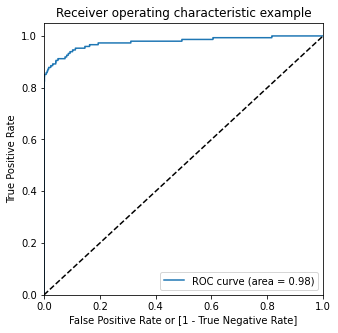

In [30]:
# predict on test data
y_test_pred = best_lr_model.predict(X_test)

# check area under curve
y_test_pred_prob = best_lr_model.predict_proba(X_test)[:, 1]
draw_roc(y_test, y_test_pred_prob)

In [31]:
evaluate_model(y_test, y_test_pred, y_test_pred_prob, mod="Logistic Regression", sampling=None, is_test=True)

Confusion Matrix  

[[85280    15]
 [   62    86]] 

Accuracy : 0.9990988144142879
Precision : 0.8514851485148515
Recall : 0.581081081081081
AUC-ROC : 0.9760700937762898 

Classification Report  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.58      0.69       148

    accuracy                           1.00     85443
   macro avg       0.93      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443

Sensitivity: 	0.58
Specificity: 	1.0


### Decision Tree

In [ ]:
# define hpt
params = {
    "max_depth": [5, 10, 20, 30],
    "min_samples_leaf": [5, 10, 20, 50, 100, 150],
    "min_samples_split": [5, 10, 20, 50, 100, 150],
}

cv_num = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)

# perform cross validation using Gridsearch CV
dt_cv = GridSearchCV(estimator = DecisionTreeClassifier(), 
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = cv_num, 
                        return_train_score=True,
                        verbose = 1)

# fitting the model
dt_cv.fit(X_train, y_train) 

# print roc score
print("Decision Tree Classifier ROC score : ", dt_cv.best_score_)

# print best hyperparameters
print("Decision Tree Classifier best hyperparameters : ", dt_cv.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
# Fit on the best model
best_dt_model = dt_cv.best_estimator_
best_dt_model.fit(X_train, y_train)

In [ ]:

# Predictions on the train set
y_train_pred = best_dt_model.predict(X_train)

# Predicted probability on train set
y_train_pred_proba = best_dt_model.predict_proba(X_train)[:,1]

In [ ]:
draw_roc(y_train, y_train_pred_proba)

In [ ]:
evaluate_model(y_train, y_train_pred, y_train_pred_proba, mod="Decision Tree", sampling=None, is_test=False)

### Test set prediction and Evaluating metrics


In [ ]:
# predict on test data
y_test_pred = best_dt_model.predict(X_test)

# check area under curve
y_test_pred_prob = best_dt_model.predict_proba(X_test)[:, 1]
draw_roc(y_test, y_test_pred_prob)

In [ ]:
evaluate_model(y_test, y_test_pred, y_test_pred_prob, mod="Decision Tree", sampling=None, is_test=True)

In [ ]:
clf_eval_df = pd.DataFrame(
    {
        "model": model,
        "sampling": resample,
        "accuracy": accu,
        "precision": precision,
        "recall": recall,
        "F1Score": F1score,
        "ROC-AUC": roc_auc
    }
)
clf_eval_df

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = ______  #--> list of values
cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [ ]:
from imblearn import over_sampling #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = ___  #initialise the model with optimum hyperparameters
clf.fit( ) # fit on the balanced dataset
print() --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)